In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import norm
import matplotlib as mpl


#fold = imp.load_source('fold', '/home/lgrose/bitbucket/ipython_notebooks/Bayesian/fold.py')
#variogram = imp.load_source('fold', '/home/lgrose/bitbucket/ipython_notebooks/Bayesian/variogram.py')
#from variogram import *

from fold import *
import math

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import pymc as pymc

In [2]:
from bayesian_fourier_series import *
#mpl.rcParams.update({'font.size': 18})


In [3]:
wl1= 15.#15.
wl2 = 150.
N = 100
foldfourier = fourierFold(30,30,wl1,0,40,20,0)
foldfourier2 = fourierFold(30,80,wl2,0,40,20,20)
foldr = foldRotation(foldfourier)
foldr2 = foldRotation(foldfourier2)
x_ = np.linspace(0,300,300)
x  = np.arange(0, 150,1)#np.linspace(0,150,100)
#x = np.hstack([x,np.arange(100,200)])
np.random.shuffle(x)



In [4]:
mixture = True
N = 2
x = np.array([55,57])#x[:N]
fold= (foldfourier2.pos(x_))#+foldfourier.pos(x_)
foldpts = (foldfourier2.pos(x))#+foldfourier.pos(x)
x__ = x_
foldrot = np.arctan(np.gradient(fold))

foldrot*=180.0/np.pi
#foldrot+=30
#if mixture:
a = np.random.choice([1,1,1,1,1,1,1],N)
#    foldrot*=a
#x_ = []
#y_ = []

#add some noise to the x and y observations - simulate some uncertainty
for i in range(1):
    xx1, yy1 = shake_xy(x,foldrot[x]*a,5)
#   if mixture:
#        yy1*=a
#    x_.append(xx1)
#    y_.append(yy1)
#plt.plot(x,foldrot[x],'ro')
#plt.figure()
fourierseries = bayesian_fourier_series_model(xx1,yy1,1)
fourierseries.add_reference_foldshape(x_,fold)
fourierseries.add_reference_foldlocations(x,foldpts)
fourierseries.add_reference_foldprofile(x_,foldrot)
fourierseries.find_wavelength()
fourierseries.wavelengths= [140.]
print fourierseries.wavelengths
ats = 10
#fourierseries.add_likelihood_vergence(45,1)
fourierseries.add_likelihood_axial_trace(50,ats)
#fourierseries.add_likelihood_vergence(55,-1)
#fourierseries.add_likelihood_vergence(100,-1)
fourierseries.add_likelihood_axial_trace(125,ats)
#fourierseries.add_likelihood_vergence(140,1)
#fourierseries.add_likelihood_vergence(175,1)
fourierseries.add_likelihood_axial_trace(200,ats)
fourierseries.add_likelihood_axial_trace(275,ats)
#fourierseries.add_likelihood_vergence(265,-1)

#fourierseries.add_likelihood_vergence(25,1)
#fourierseries.add_likelihood_vergence(175,1)
#fourierseries.add_likelihood_vergence(225,-1)

#fourierseries.add_likelihood_vergence(295,1)
#fourierseries.add_likelihood_interlimb(120,10)
#fourierseries.add_likelihood_asymmetry(0,10)
fourierseries.setup_inference()#_mixture()
#fourierseries.find_map()
fourierseries.run_sampler(5000,2500)

bayesian_fourier_series.py:383: UserWarning: Warning: converting a masked element to nan.
  variance[i] = np.mean(ma) / 2.


0.0 4
[140.0]
 [-----------------100%-----------------] 5000 of 5000 complete in 9.3 sec

True

In [6]:
print foldrot[x]

[34.69946793  5.29231088]


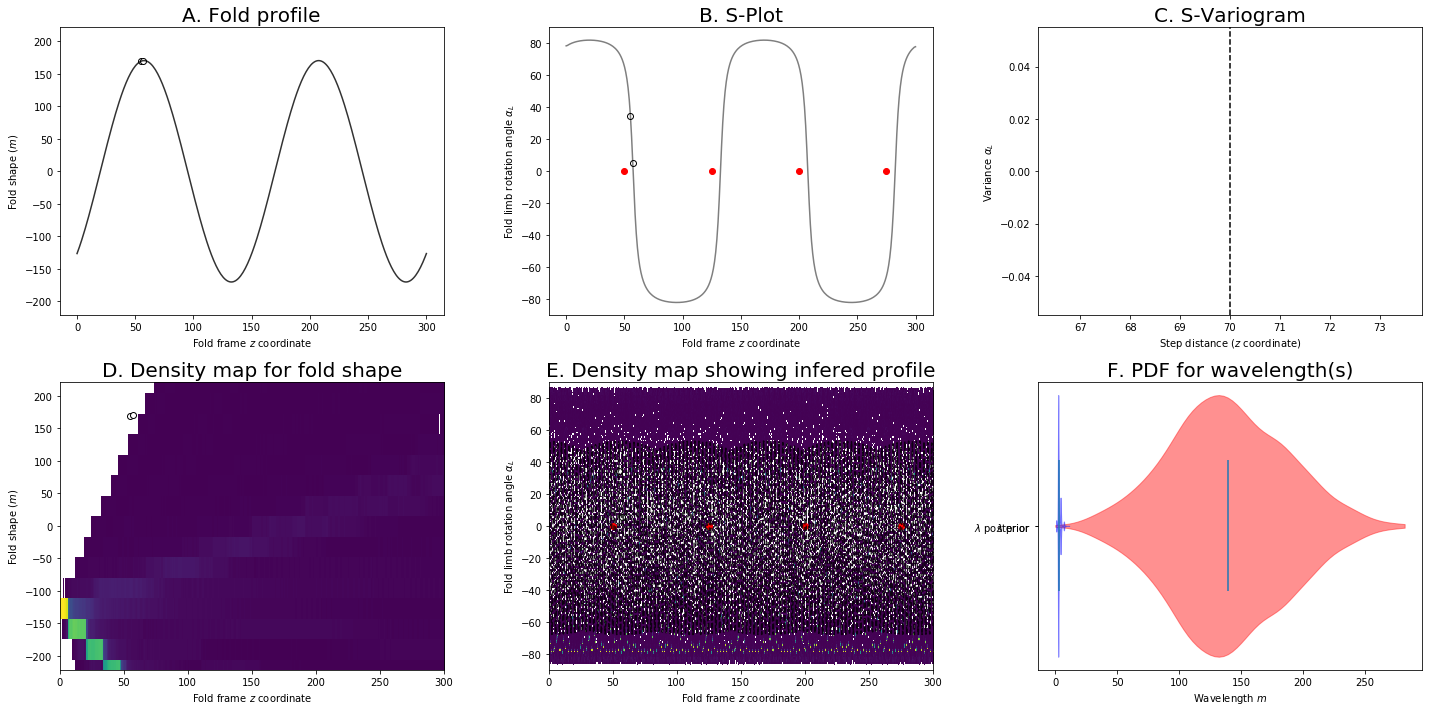

In [5]:
fig = bayesian_fourier_series_figure(fourierseries)
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('ko',0,1)
#fig.plot_reference_fold_shape('b-',0,1)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('ko',1,1)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile',fontsize=20)
fig.ax[0][1].set_title(r'B. S-Plot',fontsize=20)
fig.ax[0][2].set_title(r'C. S-Variogram',fontsize=20)

fig.ax[1][1].set_title(r'E. Density map showing infered profile',fontsize=20)
fig.ax[1][0].set_title(r'D. Density map for fold shape',fontsize=20)
fig.ax[1][2].set_title(r'F. PDF for wavelength(s)',fontsize=20)
for v in fourierseries.axial_trace_likelihoods:
    for i in range(2):
        fig.ax[i][1].plot(v, 0, 'ro')
        #fig.ax[i][1].plot(v+fourierseries.axial_trace_sigma, 0, 'ro')
        #fig.ax[i][1].plot([v-fourierseries.axial_trace_sigma,v+fourierseries.axial_trace_sigma], [0, 0], 'r-')
for v in fourierseries.vergence:
    y1 = 60
    y2 = 45
    if v[1] == -1:
        y1 = -60
        y2 = -45        
    fig.ax[1][1].annotate(' ',xy=(v[0],y1),xytext=(v[0],y2),arrowprops=dict(facecolor='black', shrink=0.05),)
    fig.ax[0][1].annotate(' ',xy=(v[0],y1),xytext=(v[0],y2),arrowprops=dict(facecolor='black', shrink=0.05),)
    
if fourierseries.interlimb_likelihoods:
    fig.ax[1][1].axhline(fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')
    fig.ax[1][1].axhline(-fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')
    fig.ax[0][1].axhline(fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')
    fig.ax[0][1].axhline(-fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')
fig.ax[1][1].set_xlim(0,300)
fig.ax[1][1].set_ylim(-90,90)
#fig.plot_values(0, 1, fold.fold_axis_sv.lags, fold.fold_axis_sv.variance, 'ko', 4)
fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][2].set_ylabel(r'Variance $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(fig.fourier_series_model.reference_fold_y[0])
#for i in range(10):
#    c, w = fig.plot_random_curve(i)
#print c,w
fig.plot_map(0,300,'k--')
#print ,fig.fourier_series_model.map.qw[1].value
colours = ['b-','r-']
#for i in range(len(fig.fourier_series_model.wavelengths)):
temp = fig.ax[0][0]
i = 0
#temp = fig.plot_kde('c_%i'%(i),1,2,'c_%i'%i,colours[i])
    #except:
    #    print "fail"
    #if i == 0:
    #    temp = fig.plot_normal_pdf(1,2,fig.fourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    #else:
    #    fig.plot_normal_pdf2(temp,fig.fourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    # print fig.fourier_series_model.map.qw[i].value
    #temp.legend(loc=i)
    #fig.plot
arrays = []
pos = []
labels = []
c = len(fourierseries.wavelengths)/2
for i in range(len(fourierseries.wavelengths)):
    arrays.append(np.random.normal(fourierseries.wavelengths[i],fourierseries.wavelengths[i]/3.,1000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    #c-=1
    arrays.append(fourierseries.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
plt.tight_layout()


In [6]:
def plot_model(model,jj,ii):
    wavelength_number = len(model.wavelengths)
    C_ =  []
    i = 0
    C_.append(model.S.trace('c_%i' %(i))[:])
    i+=1
    for _ in range (2*model.N*wavelength_number):
        print i
        C_.append(model.S.trace('c_%i' %(i))[:])
        i+=1
    qw = []
    for x in range(wavelength_number):
        qw.append(model.S.trace('qw_%i' %x)[:])
    ends_ = (model.xmax-model.xmin)*2
    xmin = 0
    xmax = 300
    x = np.linspace(xmin,xmax,600)
    v = np.array((C_[0][:,None]))
    #v.fill(0.0)
    for w in range(wavelength_number):
        for i in range(1,model.N+1):
            v = v + C_[(2*i-1)+2*model.N*w][:,None]*\
            np.cos(2*np.pi/qw[w][:,None] * i * x) + C_[(2*i)+2*model.N*w][:,None]\
            *np.sin(2*np.pi/qw[w][:,None] * i * x)
    v = np.arctan(v)*180.0/np.pi
    x = x
    #ymin = -90
    #ymax = 90
    x_f = np.tile(x,len(qw[0]))
    y_f = v.flatten()
    vv = np.linspace(-90,90,180)

    H = np.zeros((len(x),len(vv)))
    for i in range(len(x)):
        for j in range(len(v)):
            vind = np.nonzero(np.abs(vv-v[j][i]) == np.min(np.abs(vv-v[j][i])))[0]
            H[i,vind[0]]+=1
    H/=len(qw[0])
    H[H==0.] = np.nan
    # = np.abs(np.log(H))
    im= ax[jj][ii].imshow((np.rot90(H)), cmap='rainbow', extent=[xmin, xmax, -90, 90],aspect='auto')
    #fig.plot_violin(2,2,labels,pos,arrays)
    for v in model.axial_trace_likelihoods:
        for ii in range(3):
            ax[jj][ii].plot(v, 0, 'ro')
            #fig.ax[i][1].plot(v+fourierseries.axial_trace_sigma, 0, 'ro')
            #fig.ax[i][1].plot([v-fourierseries.axial_trace_sigma,v+fourierseries.axial_trace_sigma], [0, 0], 'r-')
    for v in model.vergence:
        y1 = 60
        y2 = 45
        if v[1] == -1:
            y1 = -60
            y2 = -45
        for ii in range(3):
            ax[jj][ii].annotate(' ',xy=(v[0],y1),xytext=(v[0],y2),arrowprops=dict(facecolor='black', shrink=0.05),)
        #ax[j][1].annotate(' ',xy=(v[0],y1),xytext=(v[0],y2),arrowprops=dict(facecolor='black', shrink=0.05),)

    #if model.interlimb_likelihoods:
        #for i in range(3):
          #ax[i][1].axhline(fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')
     #   ax[jj][2].axhline(-fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')

In [7]:
mixture = True
N = 2
x = np.array([58,59])#x[:N]
fold= (foldfourier2.pos(x_))#+foldfourier.pos(x_)
foldpts = (foldfourier2.pos(x))#+foldfourier.pos(x)
x__ = x_
foldrot = np.arctan(np.gradient(fold))
samples_=15000
burn_ = 10000
foldrot*=180.0/np.pi

#foldrot+=30
#if mixture:
a = np.random.choice([1,1,1,1,1,1,1],N)
#    foldrot*=a
#x_ = []
#y_ = []

#add some noise to the x and y observations - simulate some uncertainty
for i in range(1):
    xx1, yy1 = shake_xy(x,foldrot[x]*a,5)
#   if mixture:
#        yy1*=a
#    x_.append(xx1)
#    y_.append(yy1)
#plt.plot(x,foldrot[x],'ro')
#plt.figure()
axial_trace_only = bayesian_fourier_series_model(xx1,yy1,1)
axial_trace_only.add_reference_foldshape(x_,fold)
axial_trace_only.add_reference_foldlocations(x,foldpts)
axial_trace_only.add_reference_foldprofile(x_,foldrot)
axial_trace_only.find_wavelength()
axial_trace_only.wavelengths= [140.]
ats = 10
#fourierseries.add_likelihood_vergence(45,1)
axial_trace_only.add_likelihood_axial_trace(53,ats)
#fourierseries.add_likelihood_vergence(55,-1)
#fourierseries.add_likelihood_vergence(100,-1)
axial_trace_only.add_likelihood_axial_trace(125,ats)
#fourierseries.add_likelihood_vergence(140,1)
#fourierseries.add_likelihood_vergence(175,1)
axial_trace_only.add_likelihood_axial_trace(200,ats)
axial_trace_only.add_likelihood_axial_trace(275,ats)
#fourierseries.add_likelihood_mu = np.array(mu)


#fourierseries.add_likelihood_vergence(25,1)
#fourierseries.add_likelihood_vergence(175,1)
#fourierseries.add_likelihood_vergence(225,-1)

#fourierseries.add_likelihood_vergence(295,1)
#fourierseries.add_likelihood_interlimb(120,10)
axial_trace_only.add_likelihood_asymmetry(0,10)
axial_trace_only.setup_inference()#_mixture()
#fourierseries.find_map()
axial_trace_only.run_sampler(samples_,burn_)

axial_trace_only_interlimb = bayesian_fourier_series_model(xx1,yy1,1)
axial_trace_only_interlimb.add_reference_foldshape(x_,fold)
axial_trace_only_interlimb.add_reference_foldlocations(x,foldpts)
axial_trace_only_interlimb.add_reference_foldprofile(x_,foldrot)
axial_trace_only_interlimb.find_wavelength()
axial_trace_only_interlimb.wavelengths= [140.]
ats = 10
#fourierseries.add_likelihood_vergence(45,1)
axial_trace_only_interlimb.add_likelihood_axial_trace(53,ats)
#fourierseries.add_likelihood_vergence(55,-1)
#fourierseries.add_likelihood_vergence(100,-1)
axial_trace_only_interlimb.add_likelihood_axial_trace(125,ats)
#fourierseries.add_likelihood_vergence(140,1)
#fourierseries.add_likelihood_vergence(175,1)
axial_trace_only_interlimb.add_likelihood_axial_trace(200,ats)
axial_trace_only_interlimb.add_likelihood_axial_trace(275,ats)
#fourierseries.add_likelihood_vergence(265,-1)

#fourierseries.add_likelihood_vergence(25,1)
#fourierseries.add_likelihood_vergence(175,1)
#fourierseries.add_likelihood_vergence(225,-1)

#fourierseries.add_likelihood_vergence(295,1)
axial_trace_only_interlimb.add_likelihood_interlimb(160,10)
axial_trace_only_interlimb.add_likelihood_asymmetry(0,10)
axial_trace_only_interlimb.setup_inference()#_mixture()
#fourierseries.find_map()
axial_trace_only_interlimb.run_sampler(samples_,burn_)




0.0 2
 [-----------------100%-----------------] 15000 of 15000 complete in 38.4 sec0.0 2
 [-----------------100%-----------------] 15000 of 15000 complete in 35.3 sec

True

In [8]:

vergence_trace_only = bayesian_fourier_series_model(xx1,yy1,1)
vergence_trace_only.add_reference_foldshape(x_,fold)
vergence_trace_only.add_reference_foldlocations(x,foldpts)
vergence_trace_only.add_reference_foldprofile(x_,foldrot)
vergence_trace_only.find_wavelength()
vergence_trace_only.wavelengths= [140.]
ats = 10
#vergence_trace_only.add_likelihood_vergence(45,1)
#vergence_trace_only.add_likelihood_axial_trace(50,ats)
#vergence_trace_only.add_likelihood_vergence(55,-1)
vergence_trace_only.add_likelihood_vergence(100,-1)
#vergence_trace_only.add_likelihood_axial_trace(125,ats)
#vergence_trace_only.add_likelihood_vergence(140,1)
vergence_trace_only.add_likelihood_vergence(175,1)
#vergence_trace_only.add_likelihood_axial_trace(200,ats)
#vergence_trace_only.add_likelihood_axial_trace(275,ats)
vergence_trace_only.add_likelihood_vergence(265,-1)

vergence_trace_only.add_likelihood_vergence(25,1)
vergence_trace_only.add_likelihood_vergence(175,1)
#vergence_trace_only.add_likelihood_vergence(225,-1)

vergence_trace_only.add_likelihood_vergence(295,1)
#fourierseries.add_likelihood_interlimb(120,10)
vergence_trace_only.add_likelihood_asymmetry(0,10)
vergence_trace_only.setup_inference()#_mixture()
#fourierseries.find_map()
vergence_trace_only.run_sampler(samples_,burn_)

vergence_trace_only_interlimb = bayesian_fourier_series_model(xx1,yy1,1)
vergence_trace_only_interlimb.add_reference_foldshape(x_,fold)
vergence_trace_only_interlimb.add_reference_foldlocations(x,foldpts)
vergence_trace_only_interlimb.add_reference_foldprofile(x_,foldrot)
vergence_trace_only_interlimb.find_wavelength()
vergence_trace_only_interlimb.wavelengths= [140.]
ats = 10
#vergence_trace_only_interlimb.add_likelihood_vergence(45,1)
#vergence_trace_only.add_likelihood_axial_trace(50,ats)
#vergence_trace_only_interlimb.add_likelihood_vergence(55,-1)
vergence_trace_only_interlimb.add_likelihood_vergence(100,-1)
#vergence_trace_only.add_likelihood_axial_trace(125,ats)
#vergence_trace_only_interlimb.add_likelihood_vergence(140,1)
vergence_trace_only_interlimb.add_likelihood_vergence(175,1)
#vergence_trace_only.add_likelihood_axial_trace(200,ats)
#vergence_trace_only.add_likelihood_axial_trace(275,ats)
vergence_trace_only_interlimb.add_likelihood_vergence(265,-1)

vergence_trace_only_interlimb.add_likelihood_vergence(25,1)
vergence_trace_only_interlimb.add_likelihood_vergence(175,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(225,-1)

vergence_trace_only_interlimb.add_likelihood_vergence(295,1)
vergence_trace_only_interlimb.add_likelihood_interlimb(160,10)
vergence_trace_only_interlimb.add_likelihood_asymmetry(0,10)
vergence_trace_only_interlimb.setup_inference()#_mixture()
#fourierseries.find_map()
vergence_trace_only_interlimb.run_sampler(samples_,burn_)

0.0 2
 [-----------------100%-----------------] 15000 of 15000 complete in 15.7 sec0.0 2
 [-----------------100%-----------------] 15000 of 15000 complete in 35.9 sec

True

In [9]:
mix = bayesian_fourier_series_model(xx1,yy1,1)
mix.add_reference_foldshape(x_,fold)
mix.add_reference_foldlocations(x,foldpts)
mix.add_reference_foldprofile(x_,foldrot)
mix.find_wavelength()
mix.wavelengths= [140.]
ats = 10
mix.add_likelihood_vergence(45,1)
#vergence_trace_only.add_likelihood_axial_trace(50,ats)
#mix.add_likelihood_vergence(55,-1)
mix.add_likelihood_vergence(100,-1)
#vergence_trace_only.add_likelihood_axial_trace(125,ats)
#vergence_trace_only_interlimb.add_likelihood_vergence(140,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(175,1)
#vergence_trace_only.add_likelihood_axial_trace(200,ats)
mix.add_likelihood_axial_trace(275,ats)
#vergence_trace_only_interlimb.add_likelihood_vergence(265,-1)
mix.add_likelihood_vergence(225,-1)

#vergence_trace_only_interlimb.add_likelihood_vergence(25,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(175,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(225,-1)

#vergence_trace_only_interlimb.add_likelihood_vergence(295,1)
#vergence_trace_only_interlimb.add_likelihood_interlimb(120,10)
mix.add_likelihood_asymmetry(0,10)
mix.setup_inference()#_mixture()
#fourierseries.find_map()
mix.run_sampler(samples_,burn_)

mix_inter = bayesian_fourier_series_model(xx1,yy1,1)
mix_inter.add_reference_foldshape(x_,fold)
mix_inter.add_reference_foldlocations(x,foldpts)
mix_inter.add_reference_foldprofile(x_,foldrot)
mix_inter.find_wavelength()
mix_inter.wavelengths= [140.]
ats = 10
mix_inter.add_likelihood_vergence(45,1)
#vergence_trace_only.add_likelihood_axial_trace(50,ats)
#mix_inter.add_likelihood_vergence(55,-1)
mix_inter.add_likelihood_vergence(100,-1)
mix_inter.add_likelihood_vergence(225,-1)

#vergence_trace_only.add_likelihood_axial_trace(125,ats)
#vergence_trace_only_interlimb.add_likelihood_vergence(140,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(175,1)
#vergence_trace_only.add_likelihood_axial_trace(200,ats)
mix_inter.add_likelihood_axial_trace(275,ats)
#vergence_trace_only_interlimb.add_likelihood_vergence(265,-1)

#vergence_trace_only_interlimb.add_likelihood_vergence(25,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(175,1)
#vergence_trace_only_interlimb.add_likelihood_vergence(225,-1)

#vergence_trace_only_interlimb.add_likelihood_vergence(295,1)
mix_inter.add_likelihood_interlimb(160,10)
mix_inter.add_likelihood_asymmetry(0,10)
mix_inter.setup_inference()#_mixture()
#fourierseries.find_map()
mix_inter.run_sampler(samples_,burn_)

0.0 2
 [-----------------100%-----------------] 15000 of 15000 complete in 54.0 sec0.0 2
 [-----------------100%-----------------] 15000 of 15000 complete in 44.1 sec

True

1
2
1
2
1
2
1
2
1
2
1
2


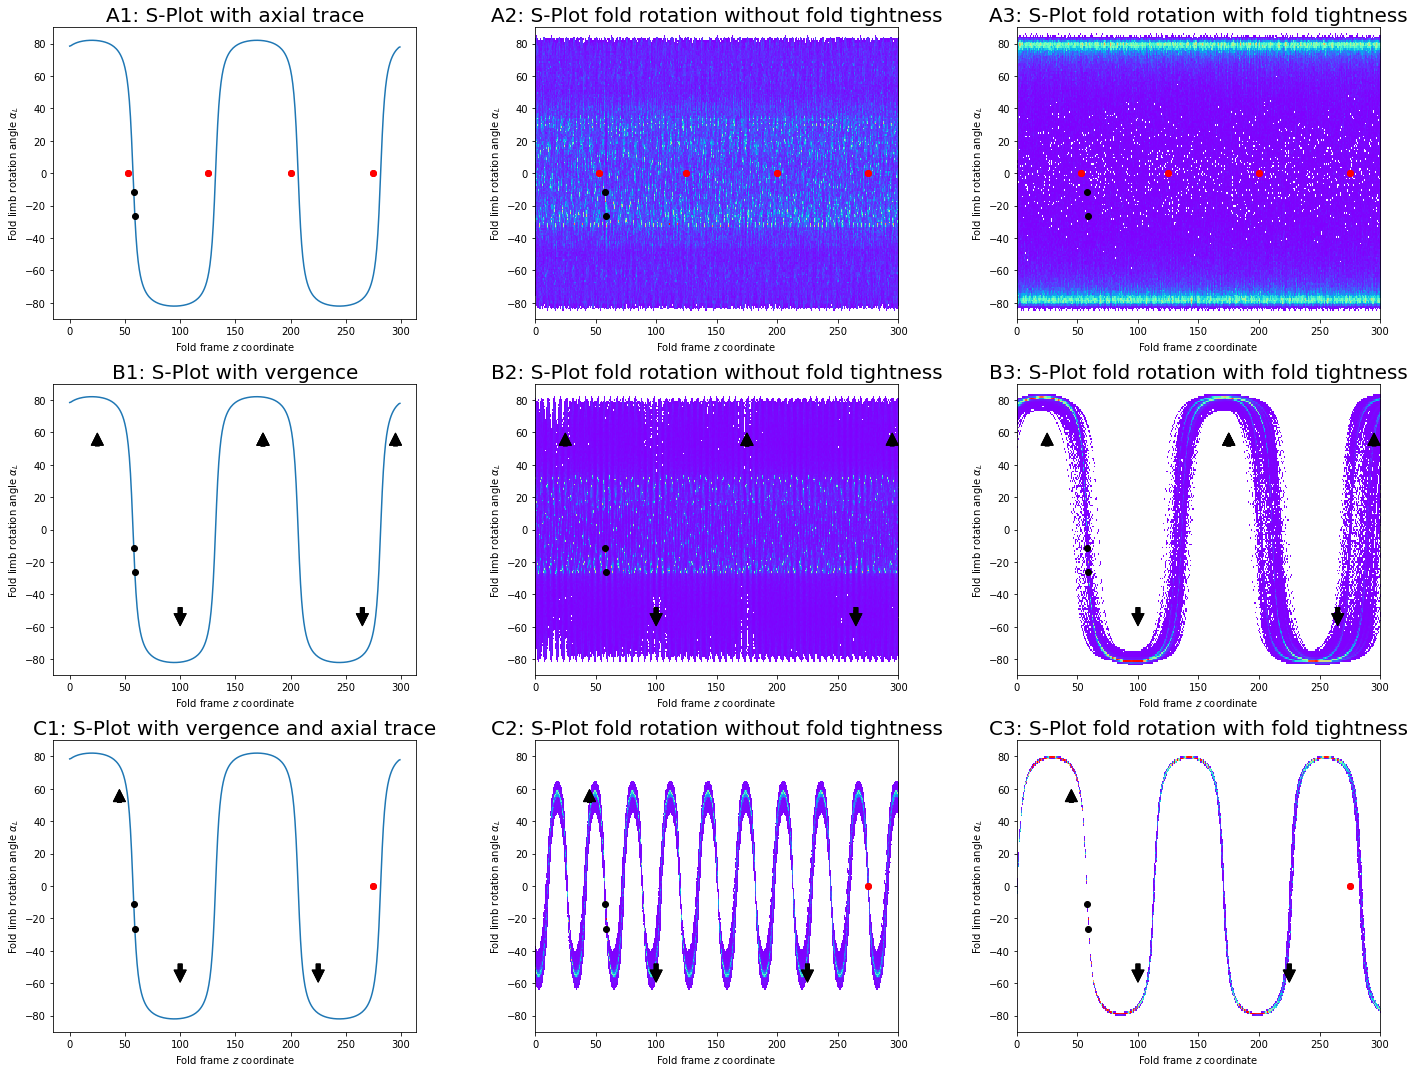

In [10]:
fig, ax = plt.subplots(3,3,figsize=(20,15))
jj = 0
#model = fourierseries#_corrected
plot_model(axial_trace_only,0,1)
plot_model(axial_trace_only_interlimb,0,2)
plot_model(vergence_trace_only,1,1)
plot_model(vergence_trace_only_interlimb,1,2)
plot_model(mix_inter,2,2)
plot_model(mix,2,1)
ax[0][0].set_title('A1: S-Plot with axial trace',fontsize=20)
ax[0][1].set_title('A2: S-Plot fold rotation without fold tightness',fontsize=20)
ax[0][2].set_title('A3: S-Plot fold rotation with fold tightness',fontsize=20)
ax[1][0].set_title('B1: S-Plot with vergence',fontsize=20)
ax[1][1].set_title('B2: S-Plot fold rotation without fold tightness',fontsize=20)
ax[1][2].set_title('B3: S-Plot fold rotation with fold tightness',fontsize=20)
ax[2][0].set_title('C1: S-Plot with vergence and axial trace',fontsize=20)
ax[2][1].set_title('C2: S-Plot fold rotation without fold tightness',fontsize=20)
ax[2][2].set_title('C3: S-Plot fold rotation with fold tightness',fontsize=20)
for i in range(3):
    ax[i][0].plot(foldrot)
    for j in range(3):
        ax[i][j].plot(axial_trace_only.xdata,np.rad2deg(np.arctan(axial_trace_only.ydata)),'ko')
        ax[i][j].set_xlabel(r'Fold frame $z$ coordinate')
        ax[i][j].set_ylabel(r'Fold limb rotation angle $\alpha_L$')    
plt.tight_layout()
for i in range(3):
    for j in range(3):
        ax[i][j].set_ylim(-90,90)

In [13]:
fig.savefig('1dknowledge.svg')